## We have the min and max temperatures in a city In India for each months of the year.
## We would like to find a function to describe this and show it graphically, the dataset given below.
## Task:
## 1.fitting it to the periodic function
## 2.plot the fit
## Data
### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
months = np.arange(12)
days = np.linspace(0, 12, num=365)
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,min_temp, [-40, 20, 0])

Text(0, 0.5, 'Temperature')

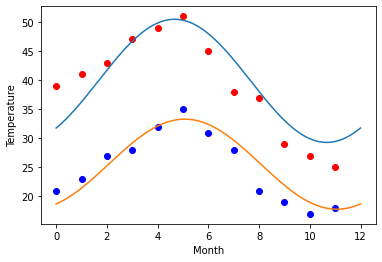

In [4]:
plt.plot(months,max_temp,'ro')
plt.plot(days, yearly_temps(days, *res_max))
plt.plot(months,min_temp,'bo')
plt.plot(days, yearly_temps(days, *res_min))
plt.xlabel('Month')
plt.ylabel('Temperature')

## Charts to plot:
### 1. Create a pie chart presenting the male/female proportion
### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic_data = pd.read_csv(url)
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [7]:
Ratio = np.array(titanic_data["sex"].value_counts())

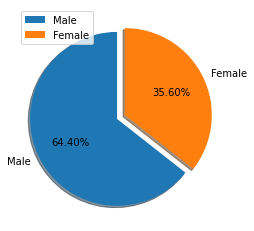

In [8]:
Labels = ["Male","Female"]
explodes = [0.1,0]
plt.pie(Ratio,labels = Labels,shadow=True,explode = explodes,startangle= 90,autopct='%1.2f%%')
plt.legend()
plt.show()

In [9]:
titanic_data.isnull().sum(axis = 0)

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [10]:
age_median = titanic_data["age"].median()
fare_mean = titanic_data["fare"].mean()

In [11]:
titanic_data['age'].fillna(value=age_median, inplace=True)
titanic_data['fare'].fillna(value=fare_mean, inplace=True)

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

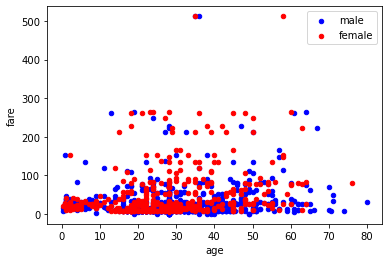

In [12]:
plt.figure()
scatterplot = titanic_data[titanic_data.sex=='male'].plot.scatter('age','fare', color='blue',label='male') 
titanic_data[titanic_data.sex=='female'].plot.scatter('age','fare',color='red',label='female',ax=scatterplot)